In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

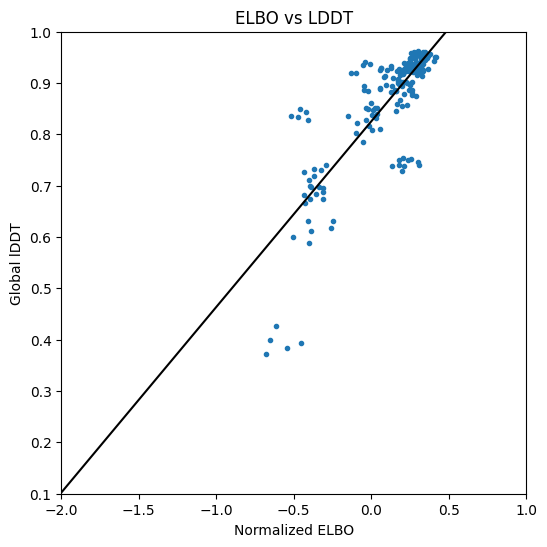

In [42]:
datas = pd.read_csv('data.csv')
#remove lines with missing values
datas = datas.dropna()

#pointplot with "elbo" as x and "lddt" as y
plt.figure(figsize=(6, 6))
plt.xlim(-2, 1)
plt.ylim(0.1,1)
plt.title('ELBO vs LDDT')
plt.xlabel('Normalized ELBO')
plt.ylabel('Global lDDT')
#draw regression line through it
m, b = np.polyfit(datas['elbo'], datas['lddt'], 1)
#smaller point size
plt.plot(datas['elbo'], datas['lddt'], 'o',c='#1f77b4', markersize=3)
plt.plot(range(-2, 2), m*range(-2, 2) + b, c='black')
plt.show()


In [43]:
len(np.unique(datas['name']))

33

In [44]:
#mean values table
#we print the mean values of the columns for each group in "name" column
#sort by residuecount
#print(datas.groupby('name').mean().sort_values(by='residuecount', ascending=False))
#mean of each column:
#print(datas.mean())

#for each group in "name" column, we find the observation with highest "elbo" value. Then we compute the mean of the "lddt" values of these observations.
datas.loc[datas.groupby('name')['elbo'].idxmax()].mean()


/var/folders/cr/dkcd034d4_qd726w_qfzwsch0000gn/T/ipykernel_67215/1468376759.py:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  datas.loc[datas.groupby('name')['elbo'].idxmax()].mean()


seqlen    195.939394
elbo        0.155604
rmsd        3.139091
tm          0.864570
gdt_ts      0.841164
gdt_ha      0.718630
lddt        0.870830
dtype: float64

In [45]:
print(np.unique(datas.name))

['4FPQ' '5SN5' '7EKA' '7FPL' '7FSL' '7FUW' '7G0O' '7GAD' '7GAU' '7GZ1'
 '7H07' '7H08' '7H33' '7H6V' '7HGG' '7HGT' '7HIJ' '7HLW' '7HM1' '7N8G'
 '7Y86' '8B6E' '8R2Y' '8RIN' '8RSF' '8T68' '8UWM' '8VZG' '8X67' '8X6E'
 '8XB1' '8XWG' '9BA3']


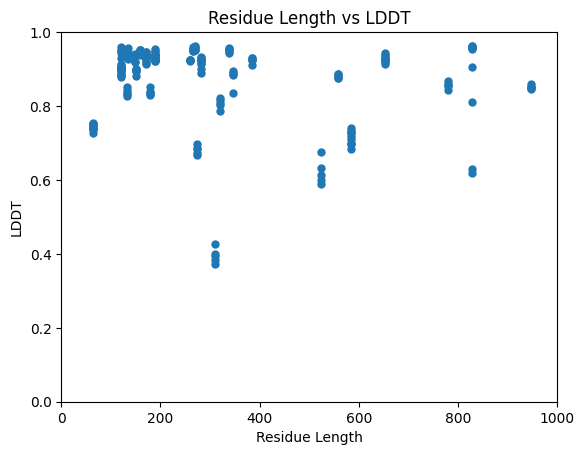

In [50]:
#plot of sequence length vs lddt
plt.title('Residue Length vs LDDT')
plt.xlabel('Residue Length')
plt.ylabel('LDDT')
plt.xlim(0,1000)
plt.ylim(0,1)
#draw regression line through it

residue_data = {'4FPQ':524, '5SN5':828, '7EKA':121, '7FPL':159, '7FSL':780, '7FUW':149, '7G0O':135, '7GAD':121, '7GAU':121, '7GZ1':338, '7H07':170, '7H08':170, '7H33':150, '7H6V':652, '7HGG':282, '7HGT':282, '7HIJ':652, '7HLW':188, '7HM1':188, '7N8G':270, '7Y86':178, '8B6E':132, '8R2Y':265, '8RIN':584, '8RSF':384, '8T68':274, '8UWM':558, '8VZG':260, '8X67':63, '8X6E':310, '8XB1':346, '8XWG':320, '9BA3':947}
residue_values = [residue_data[name] for name in datas['name']]
m, b = np.polyfit(residue_values, datas['lddt'], 1)
#plt.plot(range(0, 1000), m*range(0, 1000) + b, c='black')
plt.plot(residue_values, datas['lddt'], 'o', c='#1f77b4',markersize=5)
plt.show()